# WordCloud


In [2]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from os import path
from PIL import Image
from textblob import Word
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings 
warnings.filterwarnings("ignore")


nltk.download("stopwords", quiet=True)

True

In [3]:
df = pd.read_csv("YORUMLAR.csv", encoding='cp1254', header=None, names=["Name", "Brand", "Comment","Rate"])
df.head()


,Name,Brand,Comment,Rate
0,Monster Abra A7 V13.2.3 Intel Core I5-11400h 1...,MONSTER,oyun için aldık. f/p ürünü,5.0
1,Monster Abra A7 V13.2.3 Intel Core I5-11400h 1...,MONSTER,Gerçekten aldığım için hiç pişman olmadım hızl...,5.0
2,Monster Abra A7 V13.2.3 Intel Core I5-11400h 1...,MONSTER,çok beğendim indirimde almıştım,5.0
3,Monster Abra A7 V13.2.3 Intel Core I5-11400h 1...,MONSTER,çok iyi paketlenmiş teşekkürler,5.0
4,Monster Abra A7 V13.2.3 Intel Core I5-11400h 1...,MONSTER,İndirimde iken aldikk çok iyi cihaz 10/10,5.0


In [4]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)


In [5]:
train["Comment"].fillna("", inplace=True)
train["Comment"] = train["Comment"].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
train["Comment"] = train["Comment"].str.replace("[^\w\s]", "")
train["Comment"] = train["Comment"].str.replace("\d", "")


In [6]:
train.head()

,Name,Brand,Comment,Rate
240,Apple Macbook Air 13'' M1 8gb 256gb Ssd Uzay G...,APPLE,tek kelimeyle mükemmel bir ürün,5.0
1669,Casper Excalibur Intel Core i7-11600H 16GB 500...,CASPER,oğlum çok memnun,4.0
692,DMC N90x (GTA 5) I7-86016gb Ram256gb Ssd4gb Gt...,DMC,kasa ebati küçük bilgisayar ekipmanları iyi de...,3.0
420,Casper Excalibur G770.1245-BVJ0X-B Intel Core ...,CASPER,çok beğendim gerçekten tavsiye ederim,5.0
1863,Apple Macbook Pro 13.3 Inç M2 Çip 8cpu 10gpu 8...,APPLE,sorunsuz elime ulaştı teşekkürler,5.0


In [7]:
text = train["Comment"][240]
text

'tek kelimeyle mükemmel bir ürün'

(-0.5, 399.5, 199.5, -0.5)

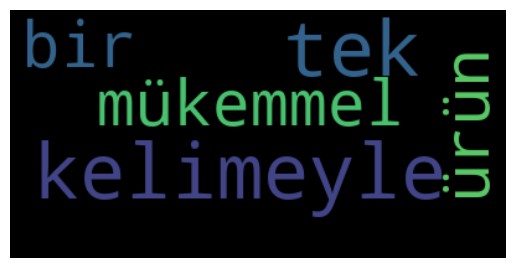

In [8]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")

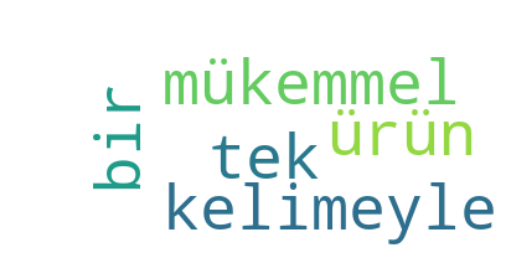

In [9]:
wordcloud = WordCloud(max_font_size = 50, max_words = 100, background_color = "white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off");

In [10]:
text_2 = train["Comment"][420]
text_2

'çok beğendim gerçekten tavsiye ederim'

(-0.5, 399.5, 199.5, -0.5)

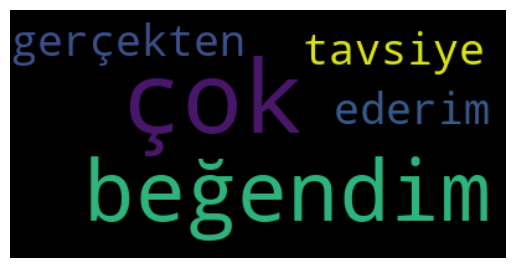

In [11]:
wordcloud = WordCloud().generate(text_2)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")

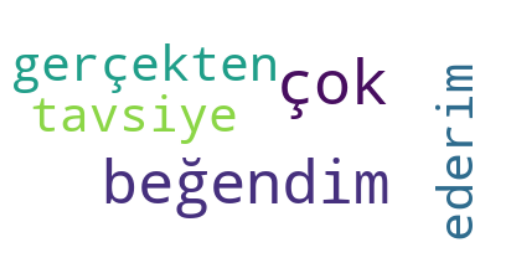

In [12]:
wordcloud = WordCloud(max_font_size = 50, max_words = 100, background_color = "white").generate(text_2)
plt.figure()
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off");

Kelime bulutunu kaydetmek için:


In [13]:
wordcloud.to_file("kelime_bulutu.png");


Tüm metin üzerinde:


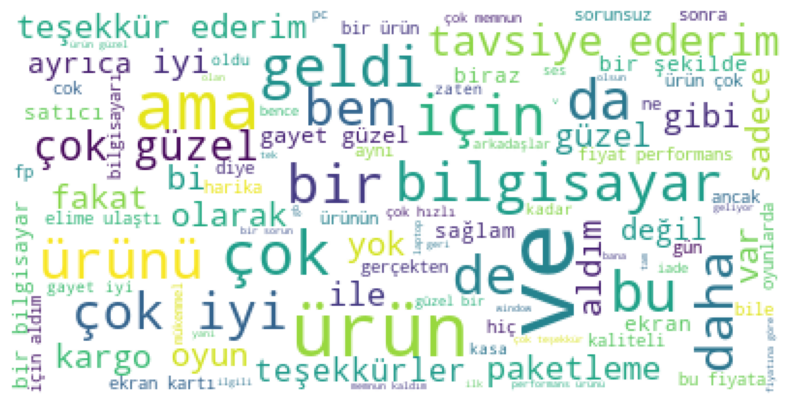

In [14]:
all_text = " ".join(i for i in train["Comment"])
wordcloud = WordCloud(max_font_size = 50, max_words = 100, background_color = "white").generate(all_text)
plt.figure(figsize = [10,10])
plt.imshow(wordcloud)
plt.axis("off");

In [15]:
wordcloud.to_file("all_words.png");


Şablonlara Göre WordCloud:


In [16]:
comment_mask = np.array(Image.open("beer.webp"))
comment_mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

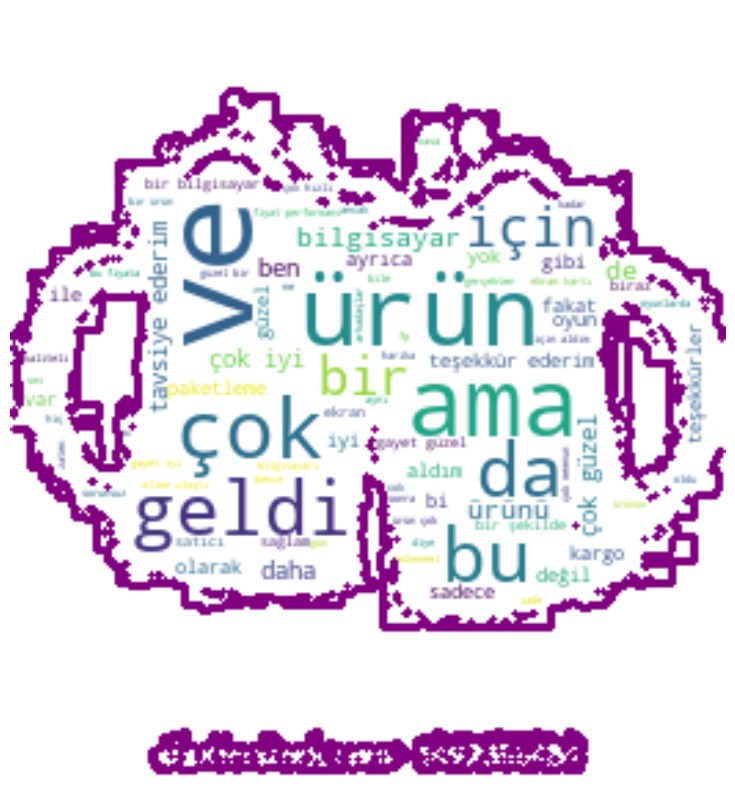

In [17]:
wordcloud = WordCloud(max_words = 100, 
                      background_color = "white", 
                      mask = comment_mask, 
                      contour_width = 3, 
                      contour_color = "purple").generate(all_text)

plt.figure(figsize = [10,10])
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off");

In [18]:
movie_mask = np.array(Image.open("coffee.jpeg"))
movie_mask

array([[[ 68,  50,  26],
        [ 66,  48,  24],
        [ 63,  45,  21],
        ...,
        [154, 115,  58],
        [147, 108,  53],
        [143, 104,  49]],

       [[ 72,  54,  30],
        [ 70,  52,  28],
        [ 66,  48,  24],
        ...,
        [154, 115,  58],
        [148, 109,  54],
        [143, 104,  49]],

       [[ 74,  56,  32],
        [ 72,  54,  30],
        [ 68,  50,  26],
        ...,
        [162, 123,  68],
        [155, 116,  61],
        [151, 111,  59]],

       ...,

       [[123,  82,  38],
        [122,  81,  37],
        [122,  81,  37],
        ...,
        [130,  88,  38],
        [129,  87,  37],
        [128,  86,  36]],

       [[123,  82,  38],
        [123,  82,  38],
        [123,  82,  38],
        ...,
        [132,  90,  40],
        [132,  90,  40],
        [131,  89,  39]],

       [[124,  83,  39],
        [124,  83,  39],
        [124,  83,  39],
        ...,
        [134,  92,  42],
        [134,  92,  42],
        [133,  91,  41]]

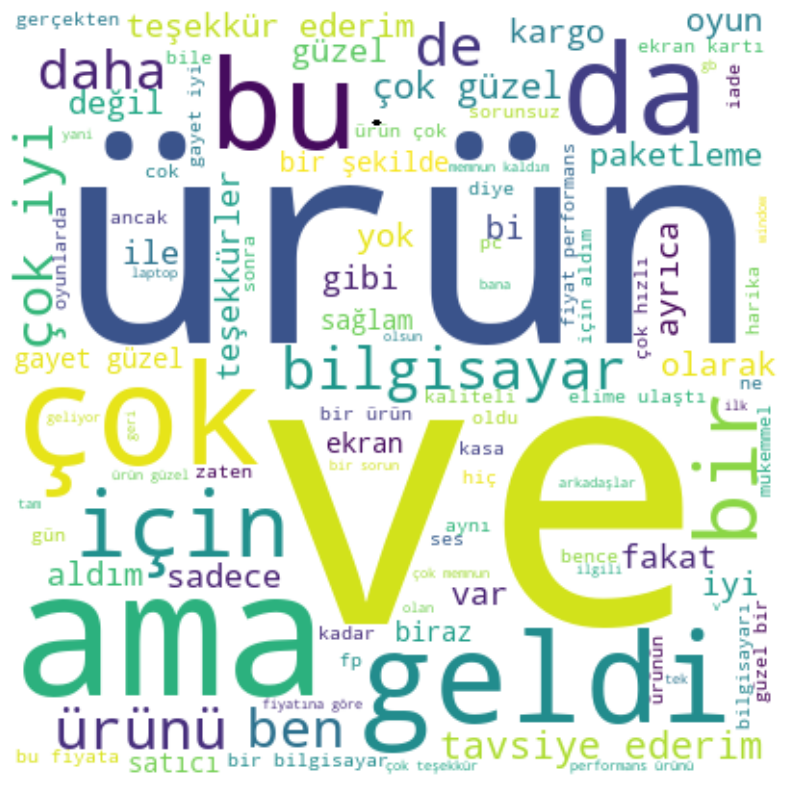

In [19]:
wordcloud = WordCloud(max_words = 100, 
                      background_color = "white", 
                      mask = movie_mask, 
                      contour_width = 3).generate(all_text)

plt.figure(figsize = [10,10])
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off");